# Working With Dates in Pandas

What is it?
- this is focusing on all the ways we can manipulate dates in pandas

Why do we care?
- being able to manipulate dates will allow us to prepare the data to analyze trends over time

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Create your own date

#### using pandas

In [3]:
#with Timestamp()
date = pd.Timestamp(month=3, day=12, year=2020)
date

Timestamp('2020-03-12 00:00:00')

In [4]:
#datatype
type(date)

pandas._libs.tslibs.timestamps.Timestamp

#### using datetime module from datetime library

In [5]:
#import
from datetime import datetime

In [7]:
#with datetime()
date = datetime(month=2, day=12, year=2020)
date

datetime.datetime(2020, 2, 12, 0, 0)

In [8]:
#datatype
type(date)

datetime.datetime

#### calculate now (using datetime module)

In [15]:
today = datetime.now()
today

datetime.datetime(2023, 7, 26, 10, 39, 52, 78781)

In [16]:
#datatype
type(date)

datetime.datetime

## Add/subtract dates

#### subtract two dates

In [17]:
today

datetime.datetime(2023, 7, 26, 10, 39, 52, 78781)

In [18]:
date

datetime.datetime(2020, 2, 12, 0, 0)

In [22]:
today - date

datetime.timedelta(days=1260, seconds=38392, microseconds=78781)

#### use Timedelta to alter a date

In [25]:
today + pd.Timedelta(days=10)

datetime.datetime(2023, 8, 5, 10, 39, 52, 78781)

## Transform to date format

### One date

In [26]:
date = 'Jan 1 1970'

In [27]:
#datatype
type(date)

str

In [30]:
#use pd.to_datetime() to convert
date = pd.to_datetime(date)
date

Timestamp('1970-01-01 00:00:00')

In [31]:
#datatype
type(date)

pandas._libs.tslibs.timestamps.Timestamp

### One date, but confuse pandas

In [57]:
date = 'Jan:7:1970'

In [58]:
#datatype
type(date)

str

In [59]:
#use pd.to_datetime() to convert
# pd.to_datetime(date)

We can fix this error using the `format` argument.

For info on formatting: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [60]:
#use format arguement
date = pd.to_datetime(date, format='%b:%d:%Y')
date

Timestamp('1970-01-07 00:00:00')

#### using `strftime` to reformat date to more readable version
- can think of it as "string format time"

In [61]:
date = date.strftime('%m ---- %d')
date

'01 ---- 07'

In [62]:
#datatype
type(date)

str

### Now a whole columns of dates

Data: the amount of coffee consumed per day

In [63]:
url = "https://gist.githubusercontent.com/ryanorsinger/\
b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)

In [65]:
#look at data
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [66]:
#datatypes
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [67]:
#use pd.to_datetime() to convert
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [73]:
#can also use .astype() to convert
df.date = df.date.astype('datetime64')

<div class="alert alert-block alert-info"> <b>NOTE:</b> use pd.to_datetime when you have weird dates, so you can use the format argument </div>

In [75]:
#datatypes
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Now that they are in a date format, let's manipulate them

In [76]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


### extract pieces of the date

<div class="alert alert-block alert-info"> <b>NOTE:</b> use <code>.dt</code> when using datetime methods/attributes on a series (just like using <code>.str</code>when using string functions) </div>

the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [80]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [81]:
df.date.dt.day_of_week

0      1
1      2
2      3
3      4
4      0
      ..
256    2
257    3
258    4
259    0
260    1
Name: date, Length: 261, dtype: int64

In [85]:
df.date.dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

### add them back to our initial dataframe

In [88]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [96]:
#add them all
df['year'] = df.date.dt.year
df['day'] = df.date.dt.day
df['day_of_week'] = df.date.dt.day_of_week

In [98]:
df

,date,coffee_consumption,day,year,day_of_week
0,2019-01-01,14.301915,1,2019,1
1,2019-01-02,12.905900,2,2019,2
2,2019-01-03,10.046015,3,2019,3
3,2019-01-04,6.354805,4,2019,4
4,2019-01-07,8.545563,7,2019,0
...,...,...,...,...,...
256,2019-12-25,12.250875,25,2019,2
257,2019-12-26,7.513206,26,2019,3
258,2019-12-27,9.464345,27,2019,4
259,2019-12-30,14.623106,30,2019,0


### reformat date using `strftime()`

In [101]:
df.date.dt.strftime('%m/%d --- %y')

0      01/01 --- 19
1      01/02 --- 19
2      01/03 --- 19
3      01/04 --- 19
4      01/07 --- 19
           ...     
256    12/25 --- 19
257    12/26 --- 19
258    12/27 --- 19
259    12/30 --- 19
260    12/31 --- 19
Name: date, Length: 261, dtype: object

## Mini exercise 

1. import the datetime module from the datetime library
2. convert the date column to a datetime
3. subtract one day from each date
4. reformat the dates as "Sun - March 26, 2022"


In [115]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')

In [117]:
from datetime import datetime

In [118]:
df.head()

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022


In [119]:
df.dtypes

date    object
dtype: object

In [121]:
#convert the date column to a datetime
df.date = df.date.astype('datetime64')
df.date

0    2022-03-27
1    2022-05-22
2    2022-05-16
3    2022-08-22
4    2022-03-15
        ...    
95   2022-01-04
96   2022-03-24
97   2022-08-28
98   2022-01-31
99   2022-05-16
Name: date, Length: 100, dtype: datetime64[ns]

In [122]:
df.dtypes

date    datetime64[ns]
dtype: object

In [123]:
# subtract one day from each date
df.date = df.date + pd.Timedelta(days=-1)
df.date

0    2022-03-26
1    2022-05-21
2    2022-05-15
3    2022-08-21
4    2022-03-14
        ...    
95   2022-01-03
96   2022-03-23
97   2022-08-27
98   2022-01-30
99   2022-05-15
Name: date, Length: 100, dtype: datetime64[ns]

In [125]:
#reformat the dates as "Sun - March 26, 2022"
df.date.dt.strftime('%a - %B %d, %Y')

0       Sat - March 26, 2022
1         Sat - May 21, 2022
2         Sun - May 15, 2022
3      Sun - August 21, 2022
4       Mon - March 14, 2022
               ...          
95    Mon - January 03, 2022
96      Wed - March 23, 2022
97     Sat - August 27, 2022
98    Sun - January 30, 2022
99        Sun - May 15, 2022
Name: date, Length: 100, dtype: object

## Time to make it more complex!

Scenario: We're looking at cryptocurrency close value and volume over time. 

In [126]:
#save url
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

#read in df
df = pd.read_csv(csv_export_url)
df

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [131]:
#lowercase columns
df.columns = df.columns.str.lower()

In [132]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


#### let's plot the our close value

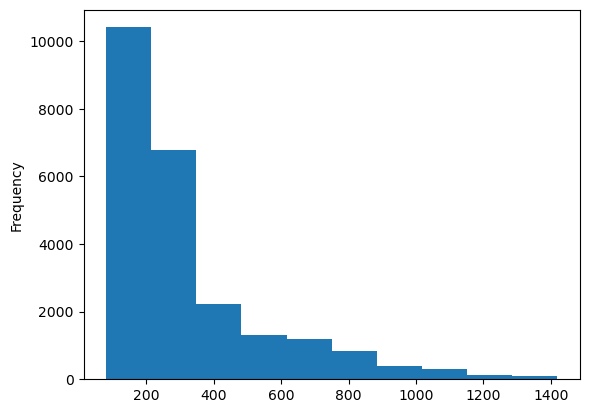

In [136]:
#distribution
df.close.plot.hist();

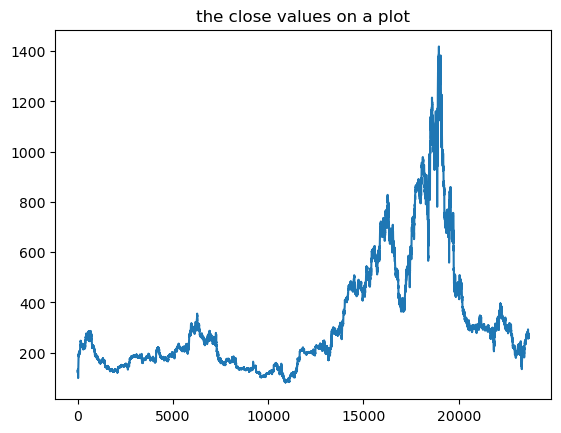

In [140]:
#line plot
df.close.plot()
plt.title('the close values on a plot')
plt.show()

In [142]:
df

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


<div class="alert alert-block alert-info"> 
    
<b>NOTE:</b> when we plot a single series using .plot(), the x-axis is the index value 

</div> 
 
 

## How do we make pandas time aware?

1. Convert 'date' column to datetime object
2. Set the datetime column as index
3. Sort the datetime index

### 1. Convert 'date' column to datetime object

In [144]:
df.dtypes

date       object
symbol     object
close     float64
volume    float64
dtype: object

Reminder: format argument allows us to tell pandas the makeup of our date, so it can be understood

In [147]:
# df.date.astype('datetime64')

In [148]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [150]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

In [151]:
df.dtypes

date      datetime64[ns]
symbol            object
close            float64
volume           float64
dtype: object

### 2. Set the datetime column as index

In [154]:
df = df.set_index('date')
df

,symbol,close,volume
date,,,
2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
2020-03-13 09:00:00,ETHUSD,124.08,2767584.44
...,...,...,...
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


### 3. Sort the datetime index

In [156]:
df = df.sort_index()

In [157]:
df.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


#### Now let's plot it again!

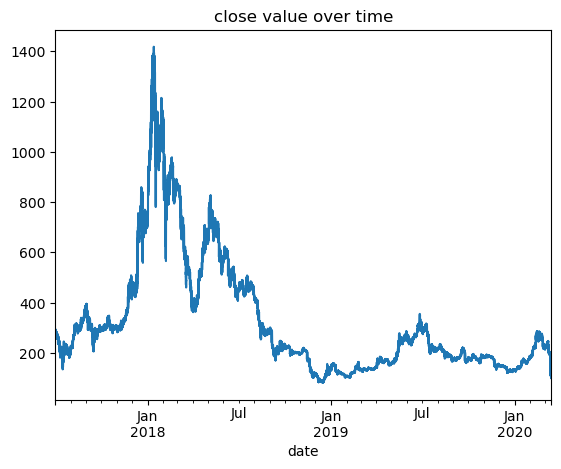

In [160]:
#line plot
df.close.plot()

plt.title('close value over time')
plt.show()

Q: Why is the graph different now?

## Let's look at the the mean close value on each day of the week

<div class="alert alert-block alert-info"> <b>NOTE:</b> when the datetime is an index, we don't use <code>.dt</code> to use datetime methods/attributes</div>

In [168]:
#pull out weekday name & save
df['weekday'] = df.index.day_name()

In [172]:
df.head()

,symbol,close,volume,weekday
date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [174]:
df.groupby('weekday').mean().close

weekday
Friday       321.134596
Monday       326.186823
Saturday     327.707441
Sunday       326.316418
Thursday     323.334524
Tuesday      325.189722
Wednesday    324.622361
Name: close, dtype: float64

#### let's plot it!

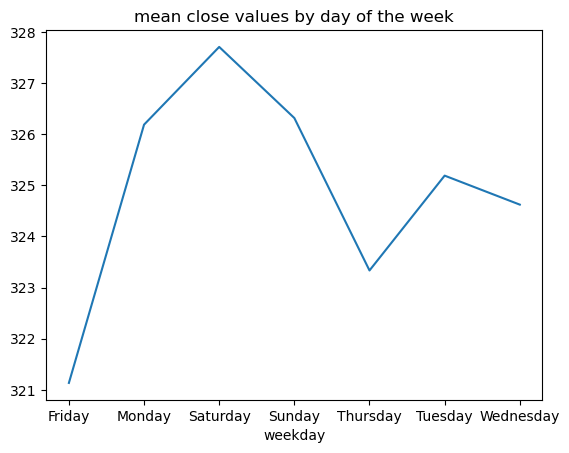

In [177]:
# plt.figure(figsize=(10,6))

df.groupby('weekday').mean().close.plot()

plt.title('mean close values by day of the week')
plt.show()

### I don't like that the days aren't in order

In [182]:
#use dayofweek attribute
df['dayofweek'] = df.index.dayofweek

In [183]:
df.head()

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5


#### let's plot it better this time!

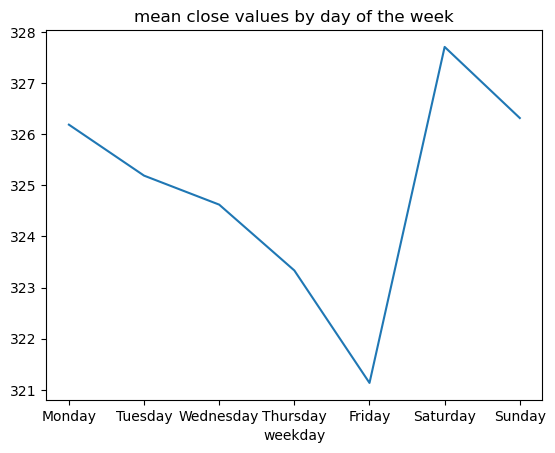

In [189]:
# plt.figure(figsize=(10,6))

df.groupby('weekday').mean().sort_values('dayofweek').close.plot()
plt.title('mean close values by day of the week')
plt.show()


## How do we get a subset of the dataframe?

`.loc` vs `.iloc`

- loc subsets based on NAME
- iloc subsets based on POSITION

Why is this helpful?
- we can use `.loc` to name a date or range of dates to subset our df

In [192]:
df.loc['2017-07-02 01:00:00']

symbol          ETHUSD
close            259.9
volume       956362.19
weekday         Sunday
dayofweek            6
Name: 2017-07-02 01:00:00, dtype: object

In [193]:
#single .loc value
df.loc['2017-07-02']

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-02 00:00:00,ETHUSD,286.00,1323285.21,Sunday,6
2017-07-02 01:00:00,ETHUSD,259.90,956362.19,Sunday,6
2017-07-02 02:00:00,ETHUSD,257.02,1335138.27,Sunday,6
2017-07-02 03:00:00,ETHUSD,257.84,596059.44,Sunday,6
2017-07-02 04:00:00,ETHUSD,260.88,771738.33,Sunday,6
2017-07-02 05:00:00,ETHUSD,274.00,1746145.00,Sunday,6
2017-07-02 06:00:00,ETHUSD,263.37,590248.89,Sunday,6
2017-07-02 07:00:00,ETHUSD,265.89,983053.30,Sunday,6
2017-07-02 08:00:00,ETHUSD,263.53,2863655.38,Sunday,6


In [194]:
#range of .loc values
df.loc['2017-7':'2017-09']

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-09-30 19:00:00,ETHUSD,302.79,301850.54,Saturday,5
2017-09-30 20:00:00,ETHUSD,302.97,737006.90,Saturday,5
2017-09-30 21:00:00,ETHUSD,300.10,1407368.63,Saturday,5


## What if we want a different period of data?
- downsampling
- upsampling
- resampling
- rolling averages
- shift/difference

In [197]:
#drop extra columns
df = df[['close']]
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


### Downsampling: reduce frequency

reduce the number of rows by removing more precise units of time
- use `asfreq` to change the period

#### Example: the level of granularity of our data is currently to the hour

In [198]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


#### reduce granularity

In [200]:
#set frequency to daily
df.asfreq('D').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-02 11:00:00,282.30
2017-07-03 11:00:00,279.50
2017-07-04 11:00:00,269.57
2017-07-05 11:00:00,265.20


In [203]:
#set frequency to monthly
df.asfreq('M').head()

,close
date,
2017-07-31 11:00:00,199.96
2017-08-31 11:00:00,388.19
2017-09-30 11:00:00,300.37
2017-10-31 11:00:00,303.45
2017-11-30 11:00:00,420.42


### Upsampling: Increase frequency
increase the number of rows by adding more precise units of time
- use `asfreq` to change the period (same as before)

#### Example: the level of granularity of our data is currently to the hour

In [204]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


#### increase granularity

In [205]:
#set frequency to minutes
df.asfreq('30T')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,NaN
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,NaN
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,NaN
2020-03-13 19:00:00,134.03


#### fill the nulls that were generated

'ffill' = forward fill

'bfill' = backward fill

In [208]:
#use ffill method
df.asfreq('30T', method='ffill').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,263.12
2017-07-01 13:00:00,275.01


In [209]:
# use bfill method
df.asfreq('30T', method='bfill').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,263.12
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,275.01
2017-07-01 13:00:00,275.01


> just filling the null values!

### Resampling - Aggregating over time
select a level of granularity and get an aggregated value from it

In [211]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


In [216]:
#get the daily mean
df_daily = df.resample('D').mean()
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [218]:
#get mean, min, max
df.resample('D').agg(['min','mean','max']).head()

close                    
               min        mean     max
date                                  
2017-07-01  257.13  265.284615  275.01
2017-07-02  256.81  269.782500  292.54
2017-07-03  274.89  278.882083  282.36
2017-07-04  268.95  276.743333  282.58
2017-07-05  255.42  265.025833  271.00

#### let's plot it!

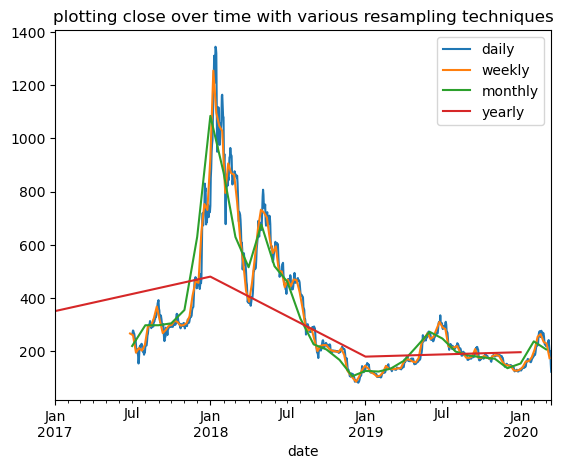

In [225]:
# plt.figure(figsize=(14,10))

df_daily.close.plot(label='daily')
df_daily.resample('W').mean().close.plot(label='weekly')
df_daily.resample('M').mean().close.plot(label='monthly')
df_daily.resample('Y').mean().close.plot(label='yearly')

plt.title('plotting close over time with various resampling techniques')
plt.legend()
plt.show()

### Rolling averages

used to smooth out short-term fluctuations in time series data and highlight long-term trends
- use `rolling()` to calculate

In [226]:
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [229]:
#use the rolling function
df_daily.rolling(5).mean().head(10)

,close
date,
2017-07-01,NaN
2017-07-02,NaN
2017-07-03,NaN
2017-07-04,NaN
2017-07-05,271.143673
2017-07-06,271.382750
2017-07-07,268.214667
2017-07-08,260.747833
2017-07-09,254.361833


> the rolling average is the previous number of units averaged together  
> in this example, the rolling average on 2017-07-05 is the average of 2017-07-01 - 2017-07-05

#### let's plot it!

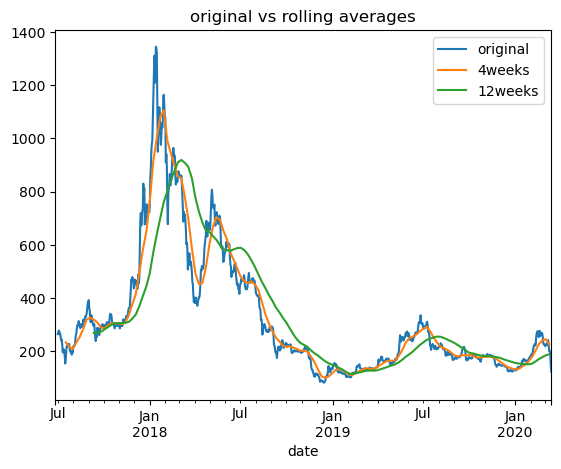

In [236]:
# plt.figure(figsize=(12,8))

#original granularity
df_daily.close.plot(label='original')

#resample by week and look at 4 weeks rolling
df_daily.resample('W').mean().rolling(4).mean().close.plot(label='4weeks')

#resample by week and look at 12 weeks rolling
df_daily.resample('W').mean().rolling(12).mean().close.plot(label='12weeks')

plt.legend()
plt.title('original vs rolling averages')
plt.show()

### How about Lagging or Leading the data?

* `.shift`: move the data backwards and forwards by a given amount
* `.diff`: find the difference with the previous observation (or a specified further back observation)

In [237]:
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [239]:
#shift by one
df_daily.shift(1).head()

,close
date,
2017-07-01,NaN
2017-07-02,265.284615
2017-07-03,269.782500
2017-07-04,278.882083
2017-07-05,276.743333


In [241]:
#shift by negative 1
df_daily.shift(-1).tail()

,close
date,
2020-03-09,201.577500
2020-03-10,195.910417
2020-03-11,152.763333
2020-03-12,124.060476
2020-03-13,NaN


In [248]:
#difference by one
df_daily.close.diff(1)

date
2017-07-01          NaN
2017-07-02     4.497885
2017-07-03     9.099583
2017-07-04    -2.138750
2017-07-05   -11.717500
                ...    
2020-03-09   -21.736667
2020-03-10     0.759167
2020-03-11    -5.667083
2020-03-12   -43.147083
2020-03-13   -28.702857
Freq: D, Name: close, Length: 987, dtype: float64

In [245]:
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [246]:
269.782500 - 265.284615

4.497885000000053

# Recap

- use `datetime.datetime` module
- to cast as a date
    - `.astype('datetime64')`
    - `pd.to_datetime()`
        - can use `format` argument for funky dates
- strftime notation
    - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- attritubes and methods
    - https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
- to make pandas time aware
    1. Convert 'date' column to datetime object
    2. Set the datetime column as index
    3. Sort the datetime index
- sampling methods
    - downsampling/ upsampling
        - `.asfreq()` 
        - fill nulls
            - `.ffill`/`.bfill`
    - resampling
        - `.resample()`
    - rolling average
        - `.rolling()`
        
    